In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Здесь 60 000 изображений используются для обучения сети и 10 000 изображений для оценки того, насколько точно сеть научилась классифицировать изображения.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Определение имен классов

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Первое изображение в тренировочном наборе, где значения пикселей попадают в диапазон от 0 до 255

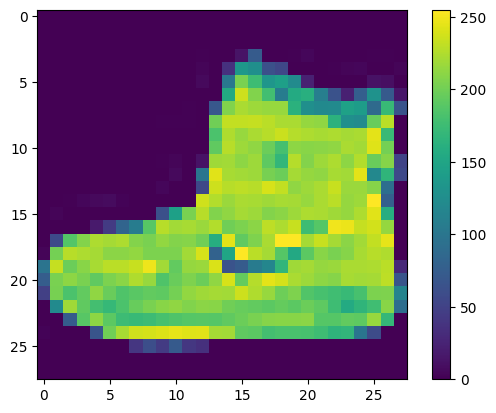

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Масштабирование значений в диапазоне от 0 до 1, прежде чем передавать их в модель нейронной сети

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Первые 25 изображений из обучающего набора

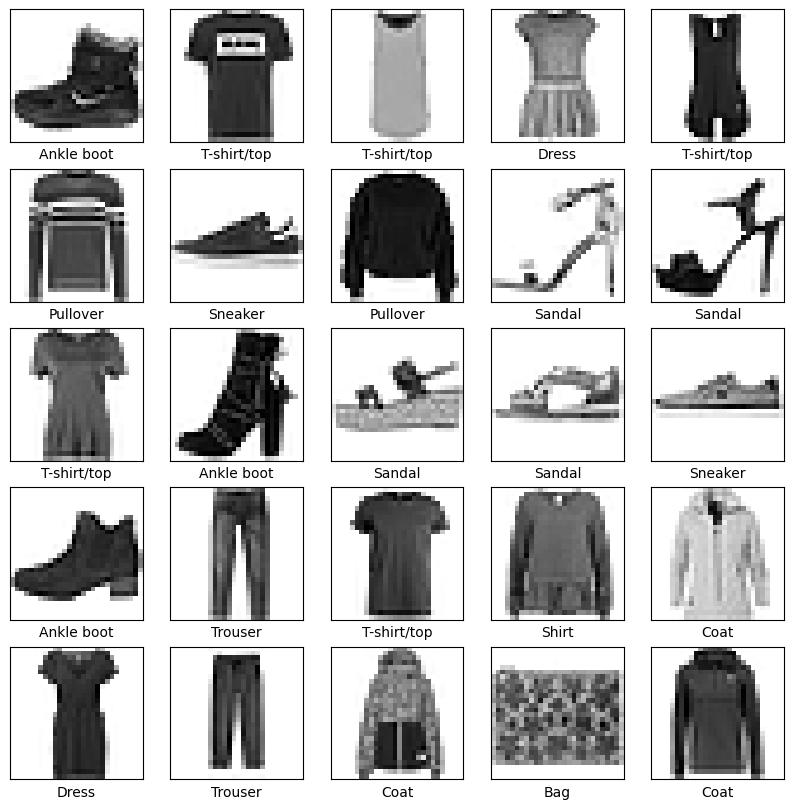

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Создание слоев сети

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Компиляция модели

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Обучение модели

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4927 - accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3737 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3359 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2788 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2672 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2479 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

Сравнение, как модель работает с тестовым набором данных

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3451 - accuracy: 0.8811 - 545ms/epoch - 2ms/step

Test accuracy: 0.8810999989509583


Добавление слоя softmax для преобразования линейных выходных данных модели — логитов — в вероятности, которые должны быть легче интерпретировать

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


Здесь модель предсказала метку для каждого изображения в тестовом наборе
Прогноз представляет собой массив из 10 чисел. Они отражают «уверенность» модели в том, что изображение соответствует каждому из 10 различных предметов одежды.

In [13]:
predictions[0]

array([1.4574503e-06, 1.7577445e-11, 3.1910004e-09, 1.8935864e-09,
       8.0861839e-10, 1.5105924e-04, 1.7291482e-06, 2.2023063e-02,
       1.4636332e-08, 9.7782272e-01], dtype=float32)

Какая метка имеет наивысшее значение достоверности

In [14]:
np.argmax(predictions[0])

9

Модель наиболее уверена, что это изображение — ботильоны или class_names[9] 

Создание функций для отоброжения plot нужного формата

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Несколько изображений с их предсказаниями

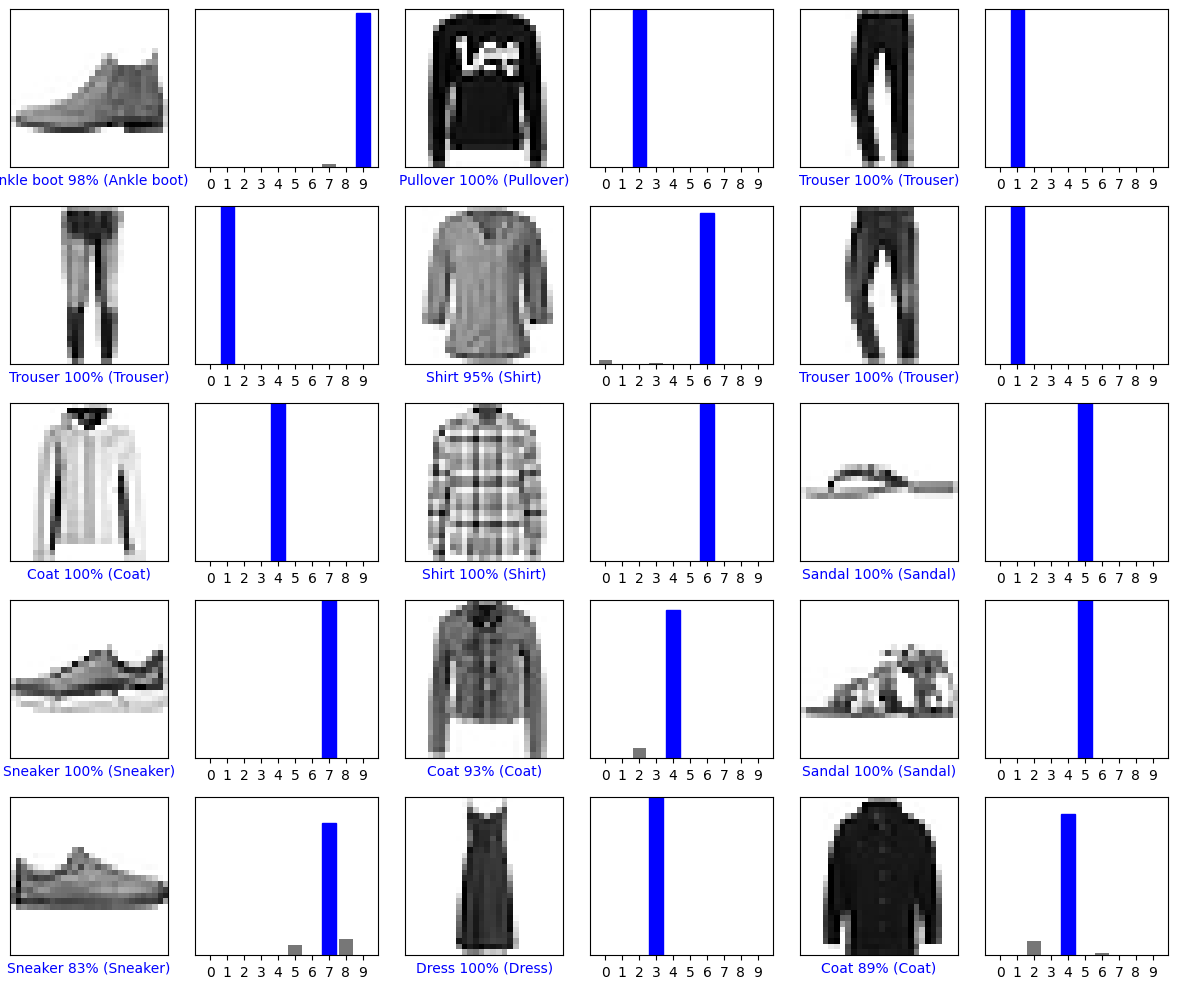

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()